# Customer Segmentation using Agglomerative Clustering

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing

In [3]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [4]:
# Normalize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### Modeling

In [5]:
model  =  AgglomerativeClustering(n_clusters=6)
model.fit(df)
labels =model.labels_
print(labels)

[5 4 1 3 2 0 5 0 3 4 0 1 3 0 3 3 3 5 0 5 3 1 3 0 4 0 3 5 5 1 0 5 3 5 3 1 1
 5 3 4 3 4 3 4 0 0 3 3 3 1 0 5 3 0 1 1 1 3 0 0 5 1 5 0 3 1 1 3 5 3 1 0 1 3
 3 1 5 5 4 0 1 1 4 5 0 3 3 3 3 3 1 1 1 3 1 0 5 5 1 3 1 4 5 0 3 0 5 3 1 0 5
 3 1 3 1 5 3 1 1 1 3 3 1 5 1 0 1 3 3 3 1 1 1 1 3 1 0 3 0 5 1 3 3 3 1 3 5 0
 3 3 1 0 5 0 1 1 4 0 3 1 3 1 1 1 3 5 1 1 3 0 0 1 1 3 1 0 5 3 3 0 5 1 3 4 5
 3 0 5 5 0 1 0 1 5 0 1 3 0 2 5 4 5 3 5 0 0 1 2 0 3 1 1 5 0 5 3 0 3 1 0 3 4
 1 3 1 1 0 3 5 0 5 1 3 3 0 3 5 3 1 3 1 1 3 3 5 4 0 5 1 3 3 3 5 1 0 3 5 3 3
 3 5 1 1 3 0 0 1 5 5 5 5 3 1 5 5 3 3 5 3 3 3 4 4 3 4 5 1 3 0 5 1 5 1 1 3 3
 3 3 3 0 0 5 3 1 1 5 5 1 1 5 1 3 0 3 5 3 5 1 5 5 0 5 0 3 3 1 3 3 1 5 1 4 3
 0 5 0 3 0 5 0 5 5 1 0 0 5 3 1 3 1 4 3 1 1 3 0 0 5 1 3 4 5 3 3 0 3 0 4 4 5
 3 3 0 0 1 5 3 1 1 3 5 3 3 0 4 1 0 3 1 5 5 1 5 1 3 1 3 4 5 1 3 3 3 3 1 0 0
 0 1 0 3 5 3 5 3 0 5 5 5 5 1 5 3 1 0 0 5 0 1 3 5 5 1 3 0 1 1 1 0 5 5 5 5 2
 5 3 5 5 0 1 0 1 3 1 4 5 3 1 3 0 0 4 3 5 3 0 1 1 1 0 0 5 5 0 0 3 5 1 3 3 3
 5 1 3 5 1 1 0 3 3 3 0 5 

### Insights
We assign the labels to each row in dataframe.

In [6]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,5
1,1.489490,1.384325,4
2,-0.252518,0.268032,1
3,-0.750235,-0.718459,3
4,1.489490,5.356249,2


Now, lets look at the distribution of customers based on their age and income:

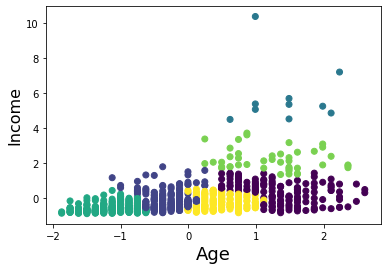

In [7]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

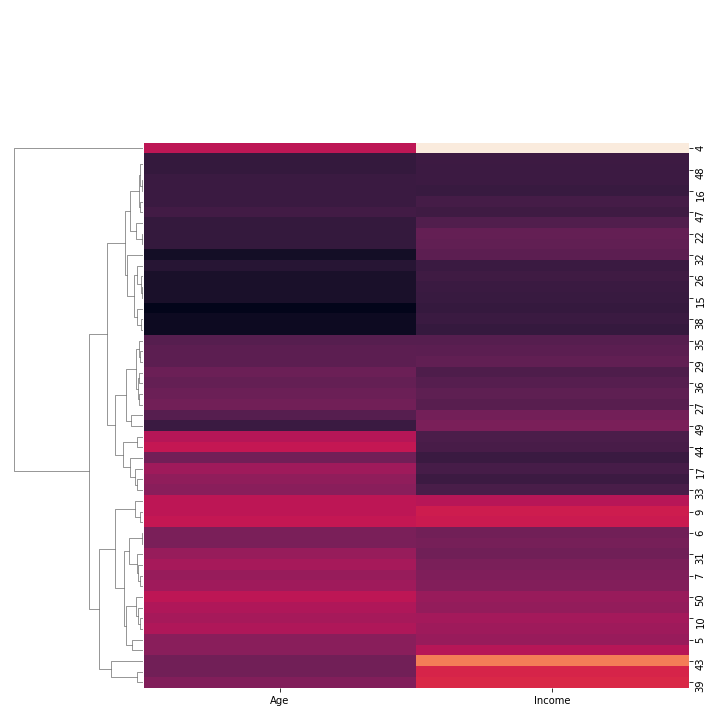

In [10]:
sns.clustermap(df.loc[:50, ['Age','Income']], cbar_pos=None,  col_cluster=False)